In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

In [196]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [197]:
infected = pd.read_csv(infected_dataset_url)
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

In [198]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

In [199]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

In [200]:
def mkframe_for(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country],
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    df['ninfected'] = df['infected'].diff()
    df['ninfav'] = df['ninfected'].rolling(window=7).mean()
    return df

us_df = mkframe_for('US')
it_df = mkframe_for('Italy')
fr_df = mkframe_for('France')
de_df = mkframe_for('Germany')
es_df = mkframe_for('Spain')

Plot Rt graphs for 5-6 different countries on one plot for comparison, or using several plots side-by-side

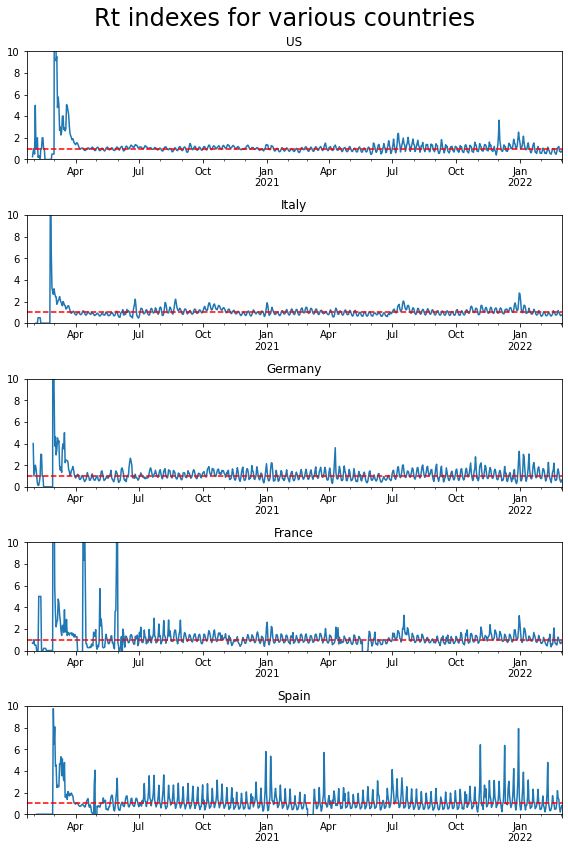

In [224]:
us_df['Rt'] = us_df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
it_df['Rt'] = it_df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
de_df['Rt'] = de_df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
fr_df['Rt'] = fr_df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
es_df['Rt'] = es_df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
countries = [us_df, it_df, de_df, fr_df, es_df]
names = ["US", "Italy", "Germany", "France", "Spain"]
def show_rt_for_countries(countries):
    fig, axes = plt.subplots(5, 1, tight_layout=True)
    for i in range(len(countries)):
        country = countries[i]
        ax = country['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(ax=axes[i], figsize=(8,12))
        ax.set_title(names[i])
        ax.set_ylim([0,10])
        ax.axhline(1,linestyle='--',color='red')
    fig.suptitle("Rt indexes for various countries", fontsize=24)
show_rt_for_countries(countries)